### import all the necessary libraries:

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

### Pass the warnings:

In [11]:
import warnings
warnings.filterwarnings('ignore')


### Read the dataset and store it into pandas dataframe:

In [12]:
import pandas as pd
df = pd.read_csv('dft-road-casualty-statistics-accident-2021.csv', low_memory=False)

# Exploratory Data Analysis:

### Displayt the shape of the dataset:

In [13]:
df.shape

(2047256, 34)

### Display the data types of all columns in the data frame:

In [14]:
df.dtypes

Accident_Index                                  object
1st_Road_Class                                  object
1st_Road_Number                                float64
2nd_Road_Class                                  object
2nd_Road_Number                                float64
Accident_Severity                               object
Carriageway_Hazards                             object
Date                                            object
Day_of_Week                                     object
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Control                                object
Junction_Detail                                 object
Latitude                                       float64
Light_Conditions                                object
Local_Authority_(District)                      object
Local_Authority_(Highway)                       object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude 

### Display the column names in the data frame:

In [15]:
df.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')

### display the general information about the dataset:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   1st_Road_Class                               object 
 2   1st_Road_Number                              float64
 3   2nd_Road_Class                               object 
 4   2nd_Road_Number                              float64
 5   Accident_Severity                            object 
 6   Carriageway_Hazards                          object 
 7   Date                                         object 
 8   Day_of_Week                                  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  float64
 10  Junction_Control                             object 
 11  Junction_Detail                              object 
 12  Latitude                                     float64
 13  Light_Condit

### Print the first 10 rows of the dataset:

In [17]:
df.head(10)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,21:13,Urban,Fine no high winds,2005,No
5,200501BS00006,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-11,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30.0,12:40,Urban,Raining no high winds,2005,No
6,200501BS00007,C,0.0,Unclassified,0.0,Slight,NaN,2005-01-13,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,20:40,Urban,Fine no high winds,2005,No
7,200501BS00009,A,315.0,NaN,0.0,Slight,NaN,2005-01-14,Friday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:35,Urban,Fine no high winds,2005,No
8,200501BS00010,A,3212.0,B,304.0,Slight,NaN,2005-01-15,Saturday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,22:43,Urban,Fine no high winds,2005,No
9,200501BS00011,B,450.0,C,0.0,Slight,NaN,2005-01-15,Saturday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,16:00,Urban,Fine no high winds,2005,No


### Convert date into pandas datetime object:

In [23]:
df['date'] = pd.to_datetime(df['Date'],)

### Extract day, month and week some useful features from 'date' column:

In [24]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week

### accident_severity is out target variable, display the unique values in accident_severity column:

### 1 = Satal, 2= Serious and 3 = Slight

In [28]:
df['Accident_Severity'].unique()

array(['Serious', 'Slight', 'Fatal'], dtype=object)

### display the value count for the accident_severity (target) variable:

In [29]:
df['Accident_Severity'].value_counts()

Accident_Severity
Slight     1734548
Serious     286339
Fatal        26369
Name: count, dtype: int64

# Univariate Analysis:

### Distribution of original data by target (accident_severity):

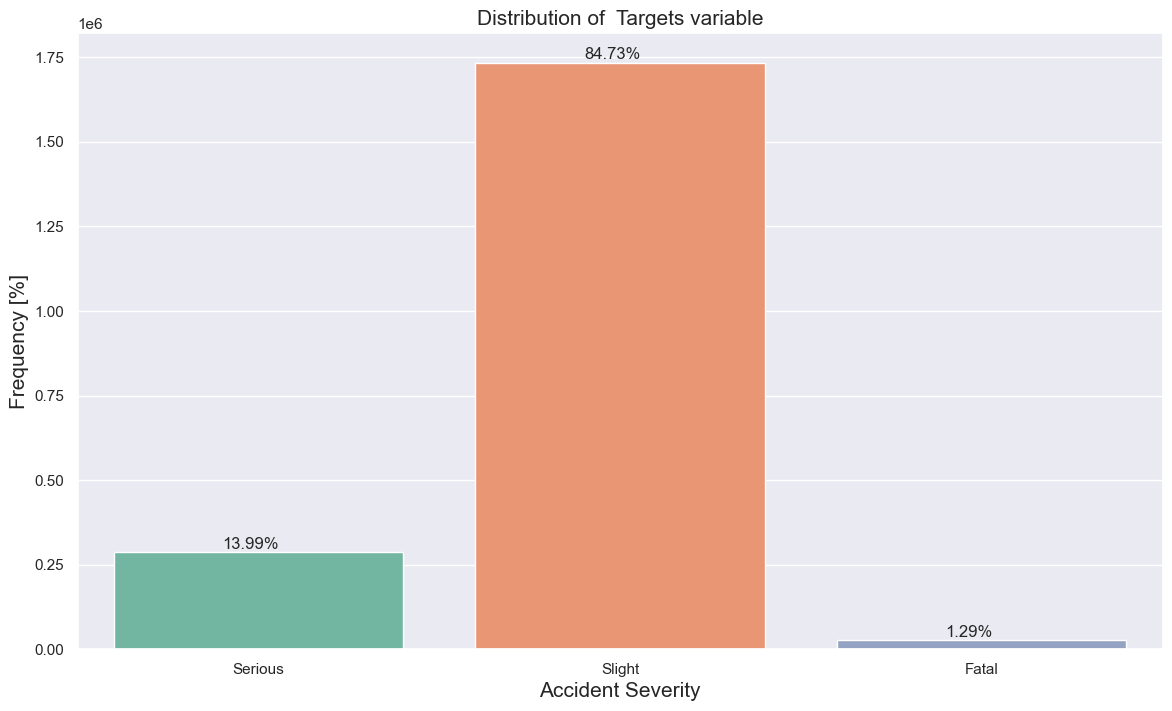

In [32]:
ax = sns.countplot(x = df.Accident_Severity ,palette="Set2")
sns.set(font_scale=1)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(14,8)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df.Accident_Severity)), (p.get_x()+ 0.3, p.get_height()+10000))

plt.title('Distribution of  Targets variable',fontsize = 15)
plt.xlabel('Accident Severity',fontsize = 15)
plt.ylabel('Frequency [%]',fontsize = 15)
plt.show()

### Number of casualties distribution

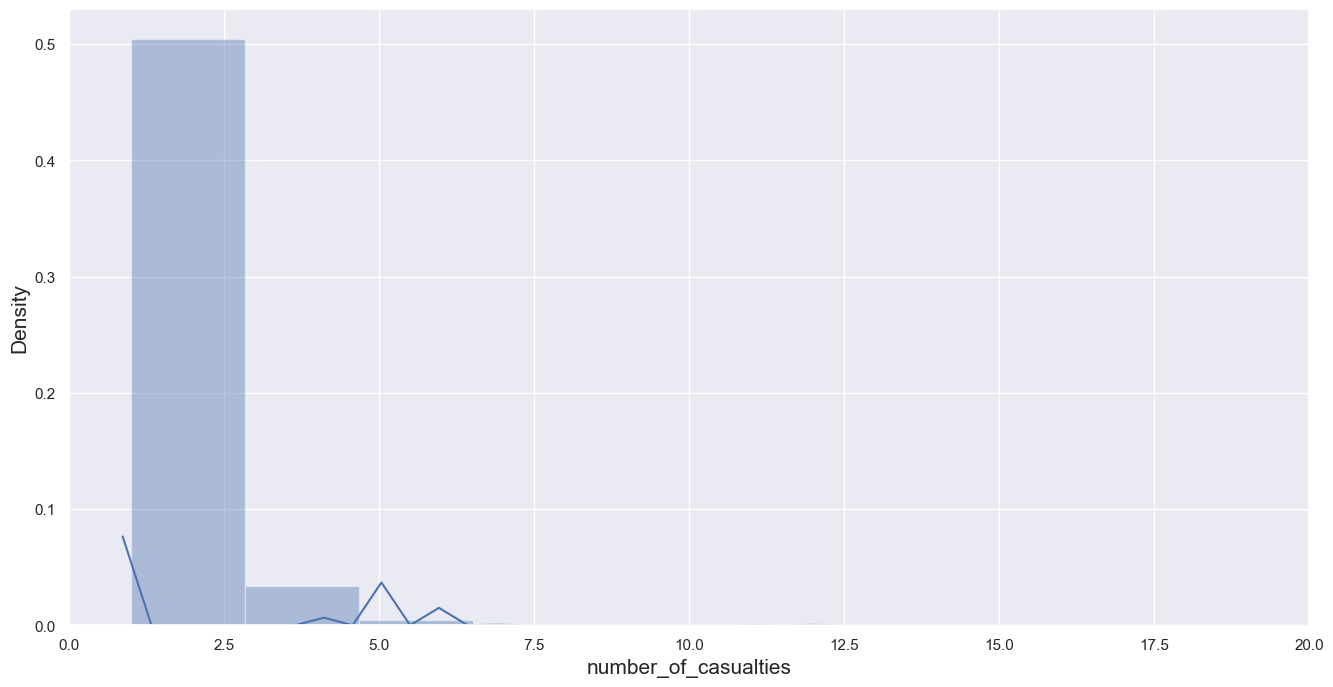

Min: 1 
Max: 93 
Median: 1.0


In [36]:
plt.figure(figsize=(16,8))
sns.distplot(df.Number_of_Casualties).set_xlim(0,20)
plt.xlabel('number_of_casualties' ,fontsize = 15)
plt.ylabel('Density',fontsize = 15)
plt.show()
print('Min:',    df.Number_of_Casualties.min(), '\n'
      'Max:',    df.Number_of_Casualties.max(), '\n'
      'Median:', df.Number_of_Casualties.median())

### Distribution of accidents over the day

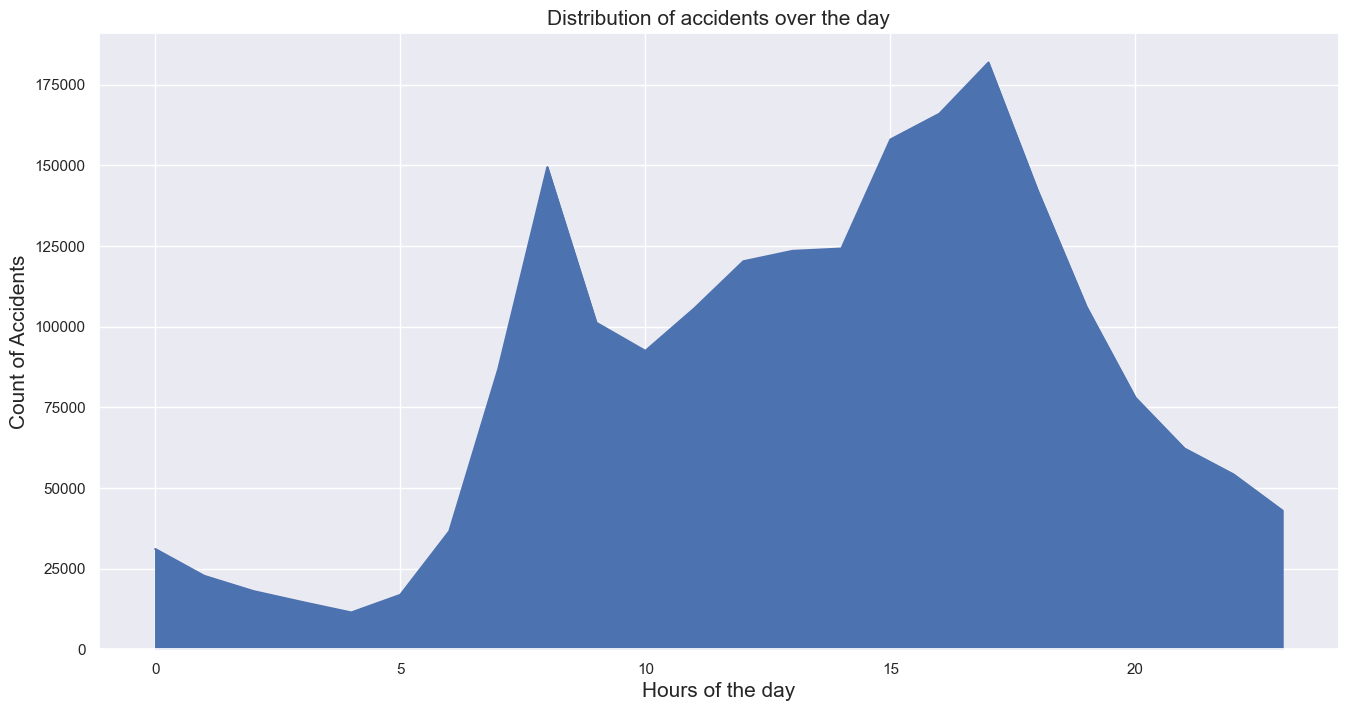

In [38]:
time_x = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
plt.figure(figsize=(16,8))
ax = time_x.value_counts().sort_index().plot(kind = 'area')
ax.set_xlabel('Hours of the day', fontsize = 15)
ax.set_ylabel('Count of Accidents', fontsize = 15)
ax.set_title('Distribution of accidents over the day', fontsize = 15)
plt.show()

### Number of vehicles distribution

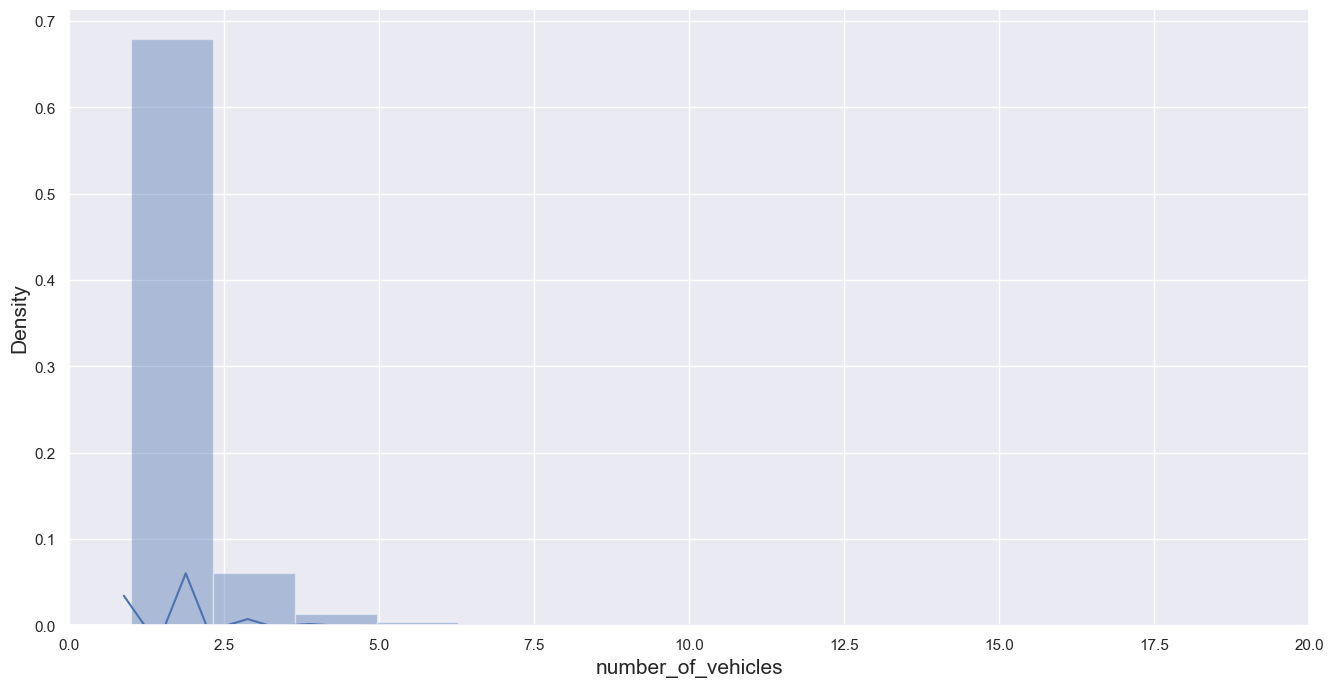

Min: 1 
Max: 67 
Median: 2.0


In [40]:
plt.figure(figsize=(16,8))
sns.distplot(df.Number_of_Vehicles).set_xlim(0,20)
plt.xlabel('number_of_vehicles',fontsize = 15)
plt.ylabel('Density',fontsize = 15)
plt.show()
print('Min:',    df.Number_of_Vehicles.min(), '\n'
      'Max:',    df.Number_of_Vehicles.max(), '\n'
      'Median:', df.Number_of_Vehicles.median())

### A boxplot to show Distribution of Speed Limit:

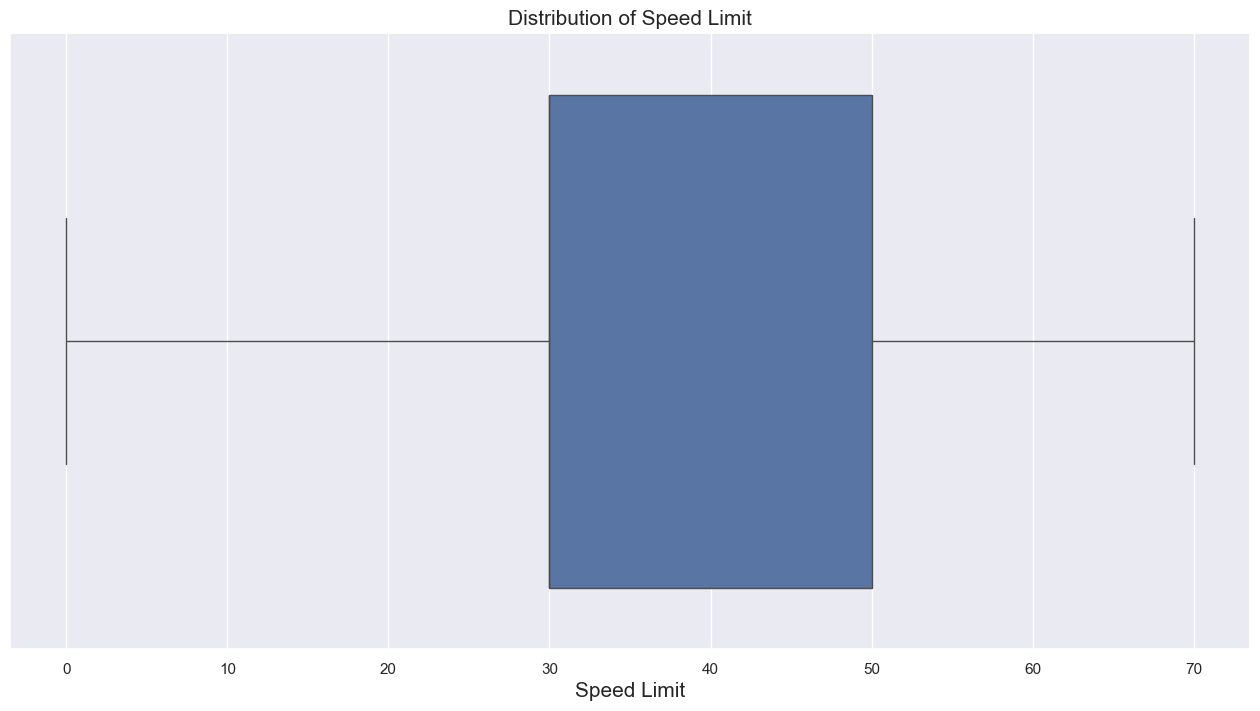

In [44]:
import seaborn as sns
plt.figure(figsize = (16, 8))
sns.boxplot(x=df["Speed_limit"])
plt.title("Distribution of Speed Limit",fontsize = 15)
plt.xlabel("Speed Limit",fontsize = 15)
plt.show()


### Bar chart of "day_of_week"

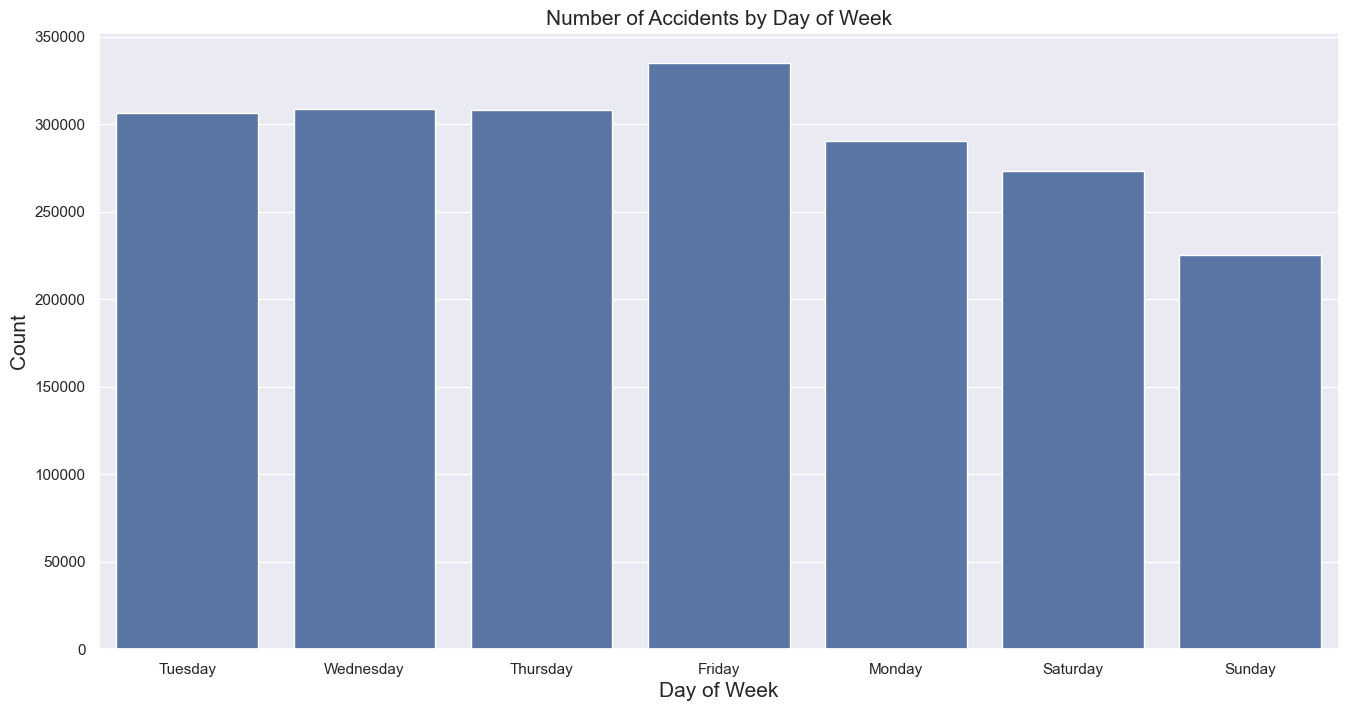

In [46]:
plt.figure(figsize = (16, 8))
sns.countplot(x=df["Day_of_Week"])
plt.title("Number of Accidents by Day of Week",fontsize = 15)
plt.xlabel("Day of Week",fontsize = 15)
plt.ylabel("Count",fontsize = 15)
plt.show()

# Multivariate Analysis:

### Scatter plot of "speed_limit" vs "number_of_casualties"

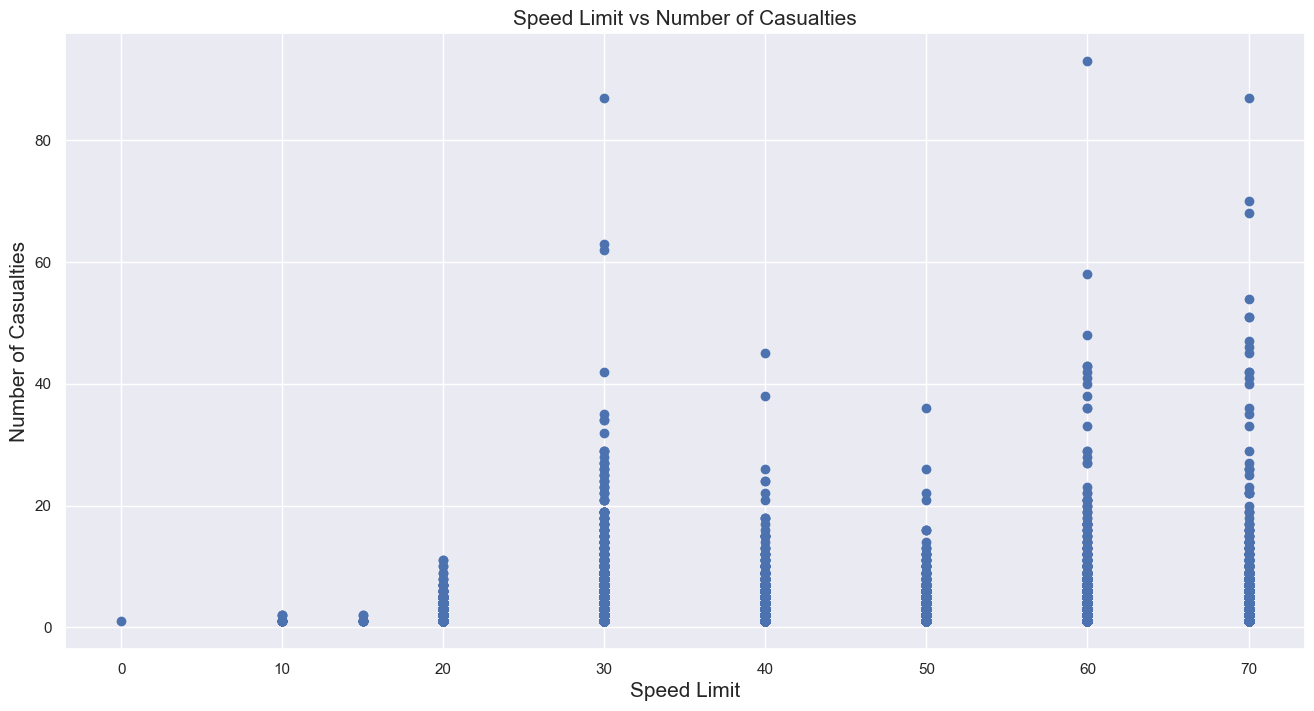

In [48]:
plt.figure(figsize = (16, 8))
plt.scatter(x=df["Speed_limit"], y=df["Number_of_Casualties"])
plt.title("Speed Limit vs Number of Casualties",fontsize = 15)
plt.xlabel("Speed Limit",fontsize = 15)
plt.ylabel("Number of Casualties",fontsize = 15)
plt.show()


### Box plot of "speed_limit" by "weather_conditions"

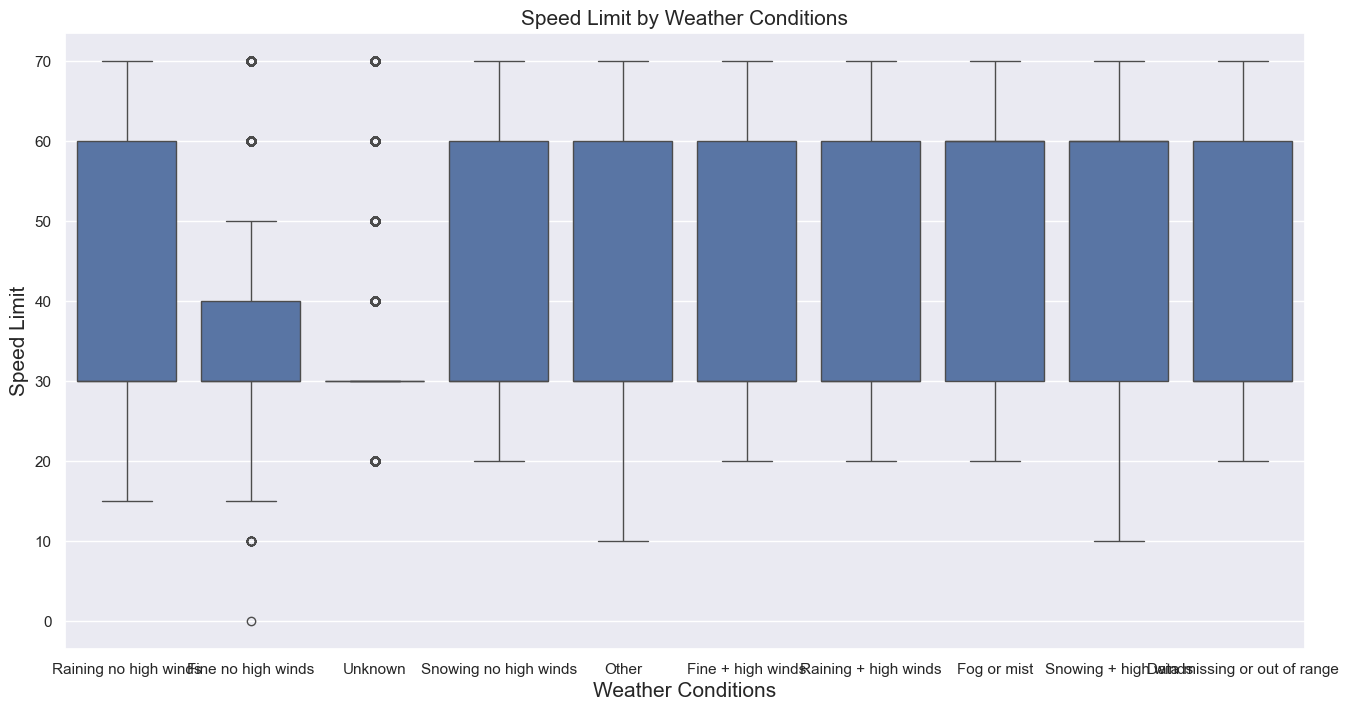

In [50]:
plt.figure(figsize = (16, 8))
sns.boxplot(x=df["Weather_Conditions"], y=df["Speed_limit"])
plt.title("Speed Limit by Weather Conditions",fontsize = 15)
plt.xlabel("Weather Conditions",fontsize = 15)
plt.ylabel("Speed Limit",fontsize = 15)
plt.show()


### Drop the unnecessary columns:

In [ ]:
ccident_index', 'accident_reference', 'local_authority_ons_district', 'local_authority_highway','time', 'date', 'lsoa_of_accident_location','accident_year'], axis = 1, inplace = True)df.drop(['a

KeyError: "['accident_index', 'accident_reference', 'local_authority_ons_district', 'local_authority_highway', 'time', 'lsoa_of_accident_location', 'accident_year'] not found in axis"

### Check are there any missing values in the data frame:

In [ ]:
df.isnull().any()

### Count the number of missing values in each column of the data frame:

In [ ]:
df.isnull().sum()

### Fill the missing values in location_easting_osgr, location_northing_osgr, longitude and latitude columns:

In [ ]:
df['location_easting_osgr'] = df['location_easting_osgr'].fillna(df['location_easting_osgr'].mean())
df['location_northing_osgr'] = df['location_northing_osgr'].fillna(df['location_northing_osgr'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].mode()[0])
df['latitude'] = df['latitude'].fillna(df['latitude'].mode()[0])

### Convert (1 = Satal, 2= Serious and 3 = Slight) to binary values (0 = Slight, 1 =  Serious): 
### Now we have binary classification problem

In [ ]:
df['accident_severity'] = df['accident_severity'].replace([2 , 1], 0)
df['accident_severity'] = df['accident_severity'].replace(3, 1)

### Value counts of the accident_severity again:

In [ ]:
df['accident_severity'].value_counts()

### Distribution of original data by targets


In [ ]:

ax = sns.countplot(x = df.accident_severity ,palette="Set2")
sns.set(font_scale=1)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(14,8)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df.accident_severity)), (p.get_x()+ 0.3, p.get_height()+10000))

plt.title('Distribution of  Targets variable',fontsize = 15)
plt.xlabel('Accident Severity',fontsize = 15)
plt.ylabel('Frequency [%]',fontsize = 15)
plt.show()

### Store features into feature matrix X and target into vector y:

In [ ]:
# Features
X = df.loc[:,df.columns != 'accident_severity']
#Target
y = df['accident_severity']

## Feature Selection using SelectKbest method:

### import SelectKBest and f_classif from sklear for feature seletion:

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

### Initialized SelectKBest with f_classif test and k= 15

In [ ]:
test = SelectKBest(score_func=f_classif, k=15)

### Fit the SelectKBest  model:

In [ ]:
fit = test.fit(X, y)

### Transform the features:

In [ ]:
filtered_features= fit.transform(X)

### Show the supporting variables given by SelectKBest (True/false):

In [ ]:
test.get_support()

### Display the scores of the features assigned by the SelectkBest:

In [ ]:
test.scores_

### Find the Feature importance for each feature:

In [ ]:
feat_importances = pd.Series(test.scores_, index=X.columns)

### Display the feature importance using a bar chart

In [ ]:
feat_importances.nlargest(15).plot(kind='barh',figsize = (16,8))
plt.show()

### Getting the column names:

In [ ]:
column_names = X.columns[test.get_support()]
column_names

### Selecting the  relevant columns given by SelectKbest only: 

In [ ]:
X_Selectkbest = X[column_names]
X_Selectkbest.head()

### Divide the data set into training and Testing sets (training set 80%, Testing set 20%):

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Selectkbest, y, test_size=0.20, random_state=0)  

### Use StandardScaler to scale the values of the dataset:

In [ ]:
SC = StandardScaler()
X_train_scaled = SC.fit_transform(X_train)
X_test_scaled = SC.fit_transform(X_test)

# 	Experimental Design:

### Logistic Regression Model

In [ ]:
#Initialize the LogisticRegression Model
Lg_classifier = LogisticRegression()
# Train the model on training set
Lg_classifier.fit(X_train_scaled, y_train)

### Make prediction and evaluation on seen data:

In [ ]:
# Make prediction on seen data
y_pred = Lg_classifier.predict(X_train_scaled)
#he Accuracy score for Logistic Regresson on seen data :
Lg_score_seen = accuracy_score(y_train, y_pred)
print('The Accuracy score for Logistic Regresson on seen data : ', Lg_score_seen)

### Make prediction and evaluation on unseen data:

In [ ]:
# Make prediction on unseen data
y_pred = Lg_classifier.predict(X_test_scaled)
#he Accuracy score for Logistic Regresson on unseen data :
Lg_score_unseen = accuracy_score(y_test, y_pred)
print('The Accuracy score for Logistic Regresson on unseen data : ', Lg_score_unseen)


### Decision Tree Classifier Model

In [ ]:
#Initialize the DecisionTreeClassifier Model
Dt_classifier = DecisionTreeClassifier()
# Train the model on training set
Dt_classifier.fit(X_train_scaled, y_train)

### Make prediction and evaluation on seen data:

In [ ]:
# Make prediction on seen data
y_pred = Dt_classifier.predict(X_train_scaled)
#he Accuracy score for decision tree on seen data :
Dt_score_seen = accuracy_score(y_train, y_pred)
print('The Accuracy score for decision tree on seen data : ', Dt_score_seen)

### Make prediction and evaluation on unseen data:

In [ ]:
# Make prediction on unseen data
y_pred = Dt_classifier.predict(X_test_scaled)
#he Accuracy score for decision tree on unseen data :
Dt_score_unseen = accuracy_score(y_test, y_pred)
print('The Accuracy score for decision tree on unseen data : ', Dt_score_unseen)


### RandomForest Classifier Model

In [ ]:
#Initialize the RandomForestClassifier Model
Rf_Classifier = RandomForestClassifier(n_estimators = 100, )
# Train the model on training set
Rf_Classifier.fit(X_train_scaled, y_train)

### Make prediction and evaluation on seen data:

In [ ]:
# Make prediction on seen data
y_pred = Rf_Classifier.predict(X_train_scaled)
#he Accuracy score for Random Forest on seen data :
Rf_score_seen = accuracy_score(y_train, y_pred)
print('The Accuracy score for Random Forest on seen data : ', Rf_score_seen)

### Make prediction and evaluation on unseen data:

In [ ]:
# Make prediction on unseen data
y_pred = Rf_Classifier.predict(X_test_scaled)
#he Accuracy score for Random Forest on unseen data :
Rf_score_unseen = accuracy_score(y_test, y_pred)
print('The Accuracy score for Random Forest on unseen data : ', Rf_score_unseen)


### Gradient Boosting Classifier Model

In [ ]:
#Initialize the GradientBoostingClassifier Model
Gb_Classifier = GradientBoostingClassifier()
# Train the model on training set
Gb_Classifier.fit(X_train_scaled, y_train)

### Make prediction and evaluation on seen data:

In [ ]:
# Make prediction on seen data
y_pred = Gb_Classifier.predict(X_train_scaled)
#he Accuracy score for Gradient Boosting on seen data :
Gb_score_seen = accuracy_score(y_train, y_pred)
print('The Accuracy score for Gradient Boosting on seen data : ', Gb_score_seen)

### Make prediction and evaluation on unseen data:

In [ ]:
# Make prediction on unseen data
y_pred = Gb_Classifier.predict(X_test_scaled)
#he Accuracy score for  Gradient Boosting on unseen data :
Gb_score_unseen = accuracy_score(y_test, y_pred)
print('The Accuracy score for  Gradient Boosting on unseen data : ', Gb_score_unseen)


### XGB Classifier Model

In [ ]:
#Initialize the XGBClassifier Model
XGB_Classifier = XGBClassifier()
# Train the model on training set
XGB_Classifier.fit(X_train_scaled, y_train)

### Make prediction and evaluation on seen data:

In [ ]:
# Make prediction on seen data
y_pred = XGB_Classifier.predict(X_train_scaled)
#he Accuracy score for XGB_Classifier on seen data :
XGB_score_seen = accuracy_score(y_train, y_pred)
print('The Accuracy score for XGB_Classifier on seen data : ', XGB_score_seen)

### Make prediction and evaluation on unseen data:

In [ ]:
# Make prediction on unseen data
y_pred = XGB_Classifier.predict(X_test_scaled)
#he Accuracy score for  XGB_Classifier on unseen data :
XGB_score_unseen = accuracy_score(y_test, y_pred)
print('The Accuracy score for XGB_Classifier on unseen data : ', XGB_score_unseen)


### KNeighbors Classifier Model

In [ ]:
#Initialize the KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier()
# Train the model on KNeighborsClassifier set
KNN_Classifier.fit(X_train_scaled, y_train)

### Make prediction and evaluation on seen data:

In [ ]:
# Make prediction on seen data
y_pred = KNN_Classifier.predict(X_train_scaled)
#he Accuracy score for KNN classifier on seen data :
KNN_score_seen = accuracy_score(y_train, y_pred)
print('The Accuracy score for KNN_Classifier on seen data : ', KNN_score_seen)

### Make prediction and evaluation on unseen data:

In [ ]:
# Make prediction on unseen data
y_pred = KNN_Classifier.predict(X_test_scaled)
#he Accuracy score for  KNN classifier on unseen data :
KNN_score_unseen = accuracy_score(y_test, y_pred)
print('The Accuracy score for KNN_Classifier on unseen data : ', KNN_score_unseen)


### Create two lists of model name and respective Accuracies:

In [ ]:
scores = pd.Series([Lg_score_unseen, Dt_score_unseen, Rf_score_unseen, Gb_score_unseen, XGB_score_unseen, KNN_score_unseen,  ])
Model_Names = ['Logistic Regression','DecisionTree Classifier','RandomForest Classifier', 'GBR Classifier' ,'XGB Classifier' ,'KNN Classifier',]

### Comparision of Models  in terms  evaluation metric (accuracy Score): 

In [ ]:
ax = scores.plot(kind = 'barh',figsize=(15,9),color=['black','gray','green','brown','pink','blue','red'])
ax.set_title('Comparision of Models (Accuracy) unseen data',fontsize=15)
ax.set_xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.set_yticklabels(Model_Names,fontsize=15,)
ax.set_ylabel("Models",fontsize=15)
ax.set_xlabel("Accuracy",fontsize=15)
[ax.text(v, i, '{:.2f}%'.format(100*v)) for i, v in enumerate(scores)];
plt.show()

# 	Evaluation and further modelling improvements

### Hyper parameter Tuning for Highest performing Model (Logistic Regression)

In [ ]:
# Create logistic regression object
lr = LogisticRegression()

# Set hyperparameters to tune
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}

###  Create GridSearchCV object and fit it on training data:

In [ ]:
# Create GridSearchCV object
clf = GridSearchCV(lr, hyperparameters, cv=5)

# Fit GridSearchCV object to training data
clf.fit(X_train_scaled, y_train)


### Print best hyperparameters and best score

In [ ]:
# Print best hyperparameters and best score
print('Best parameters:', clf.best_params_)
print('Best score:', clf.best_score_)
